In [50]:
import pandas as pd
import requests as rq

url = 'https://servicodados.ibge.gov.br/api/v1/localidades/estados/pa/municipios'
   
res = rq.request("GET", url)

#Creates a data frame with the Municipalities column.
if res.status_code == 200:
    df_munic = pd.DataFrame({'id': [], 'localidade': []})
    
    for id, munic in enumerate(res.json()):
        df_munic.loc[id] = [str(munic['id'])[:6], munic['nome']]


    90201: Delegacia especializada no Atendimento à Mulher
    90335: Executa programas e ações para grupos específicos - Mulheres
    90358: Enfrentamento à Violência contra a Mulher
    90626: Direitos ou política para mulheres
    90640: Políticas ou programas na área de direitos humanos - Proteção de mulheres vítimas de violência doméstica 

In [82]:
indicators = [ '90318']
#indicators = ['90201','90335','90358','90626','90640']
#90272 = Ações Socioeducativas - Violência doméstica e de gênero
#90318 = Orgão gestor de direitos humanos
#90766 = Instrumentos utilizados para receber denúncias de violação de direitos
#90397 = Constituição de centros de referência e atendimento em direitos humanos



url = "https://servicodados.ibge.gov.br/api/v1/pesquisas/1/periodos/2019/indicadores/"




# # Adding indicators to the end of the url
# for i, ind in enumerate(indicators):
#     if i != (len(indicators)-1):
#         url += ind + '|'
#     else:
#         url += ind + '/'
        
# # Function to Formatting final url
# def urlResultadosPorMunicipos(url, df):
#     url += 'resultados/'    

#     for i, row in df_munic.iterrows():
#         if i != (len(df)-1):
#             url += row.id + '|'
#         else:
#             url += row.id + '/'
    
#     return url


# url = urlResultadosPorMunicipos(url, df_munic)

# return json results
res = rq.request("GET", url)

res.json()

[{'id': 89503,
  'posicao': '1',
  'indicador': 'RECURSOS HUMANOS POR VÍNCULO',
  'classe': 'T',
  'children': [{'id': 89504,
    'posicao': '1.1',
    'indicador': 'Composição do quadro de pessoal da administração direta',
    'classe': None,
    'children': [{'id': 89505,
      'posicao': '1.1.1',
      'indicador': 'Estatutários',
      'classe': 'I',
      'children': [],
      'nota': []},
     {'id': 89506,
      'posicao': '1.1.2',
      'indicador': 'Celetistas',
      'classe': 'I',
      'children': [],
      'nota': []},
     {'id': 89507,
      'posicao': '1.1.3',
      'indicador': 'Somente comissionados',
      'classe': 'I',
      'children': [],
      'nota': []},
     {'id': 89508,
      'posicao': '1.1.4',
      'indicador': 'Estagiários',
      'classe': 'I',
      'children': [],
      'nota': []},
     {'id': 89509,
      'posicao': '1.1.5',
      'indicador': 'Sem vínculo permanente',
      'classe': 'I',
      'children': [],
      'nota': []},
     {'id': 89510,

In [2]:
indicators = ['90201','90335','90358','90626','90640']

url = "https://servicodados.ibge.gov.br/api/v1/pesquisas/1/periodos/2019/indicadores/"

# Adding indicators to the end of the url
for i, ind in enumerate(indicators):
    if i != (len(indicators)-1):
        url += ind + '|'
    else:
        url += ind + '/'
        
# Function to Formatting final url
def urlResultadosPorMunicipos(url, df):
    url += 'resultados/'    

    for i, row in df_munic.iterrows():
        if i != (len(df)-1):
            url += row.id + '|'
        else:
            url += row.id + '/'
    
    return url


url = urlResultadosPorMunicipos(url, df_munic)

# return json results
res = rq.request("GET", url)


In [3]:
if res.status_code == 200:
    
    #Scrolls through the json and inserts the data into the main dataframe for each selected indicator.
    for indicador in res.json():
        df_temp = pd.DataFrame(indicador['res'])
        df_temp = df_temp[['localidade', 'res']]
        df_temp.rename(columns = {'localidade':'id', 'res': indicador['id']}, inplace = True)
        
        #It replaces the words "Yes" and "No" with binary information 1 and 0.
        df_temp[indicador['id']] = df_temp[indicador['id']].map(lambda x: 1 if x['2019']  == 'Sim' else 0)
        df_munic = pd.merge(df_munic, df_temp, on="id")

In [4]:
df_munic['Rede_de_Protecao_assistencia'] = df_munic[90201] + df_munic[90335] + df_munic[90358] + df_munic[90626] + df_munic[90640]
df_munic = df_munic[['id', 'localidade', 'Rede_de_Protecao_assistencia']]

In [5]:
url = "https://servicodados.ibge.gov.br/api/v1/pesquisas/37/periodos/2010/indicadores/30255/"

url = urlResultadosPorMunicipos(url, df_munic)
        
res = rq.request("GET", url)

# correction of missing values
x = res.json()
x[0]['res'][73]['res']['2010'] = '0'
x

df_temp = pd.json_normalize(x[0]['res'])
df_temp.rename(columns={'localidade': 'id', 'res.2010': 'IDH'}, inplace=True)
df_temp = df_temp[['id', 'IDH']]
df_munic = pd.merge(df_munic, df_temp, on='id')

In [6]:
url = "https://servicodados.ibge.gov.br/api/v1/pesquisas/38/periodos/2019/indicadores/47001/"

url = urlResultadosPorMunicipos(url, df_munic)   
res = rq.request("GET", url)
df_temp = pd.json_normalize(res.json()[0]['res'])
df_temp.rename(columns={'localidade': 'id', 'res.2019': 'PIB'}, inplace=True)
df_temp = df_temp[['id', 'PIB']]
df_munic = pd.merge(df_munic, df_temp, on='id')

In [7]:
url = "https://servicodados.ibge.gov.br/api/v1/pesquisas/36/periodos/2003/indicadores/30252/"

url = urlResultadosPorMunicipos(url, df_munic)
        
res = rq.request("GET", url)
# correction of missing values
x = res.json()
x[0]['res'].append({'localidade': '150475', 'res': {'2003': '0.00'}, 'notas': {'2003': None}})

df_temp = pd.json_normalize(x[0]['res'])
df_temp.rename(columns={'localidade': 'id', 'res.2003': 'GINI'}, inplace=True)
df_temp = df_temp[['id', 'GINI']]
df_munic = pd.merge(df_munic, df_temp, on='id', how='left')

In [8]:
df_munic['Rede_de_Protecao_assistencia'] = pd.to_numeric(df_munic['Rede_de_Protecao_assistencia'])
df_munic['IDH'] = pd.to_numeric(df_munic['IDH'])
df_munic['PIB'] = pd.to_numeric(df_munic['PIB'])
df_munic['GINI'] = pd.to_numeric(df_munic['GINI'])

In [9]:
df_munic.shape

(144, 6)

c:\Users\JrDev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (200) is greater than the total number of samples (144). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\JrDev\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (200) is greater than the total number of samples (144). n_quantiles is set to n_samples.
  warnings.warn(


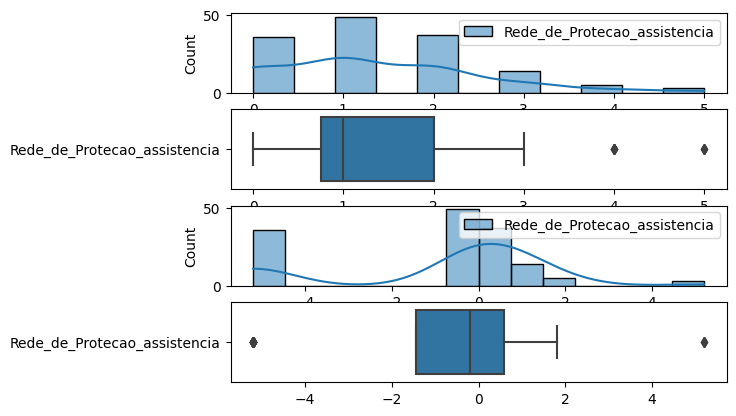

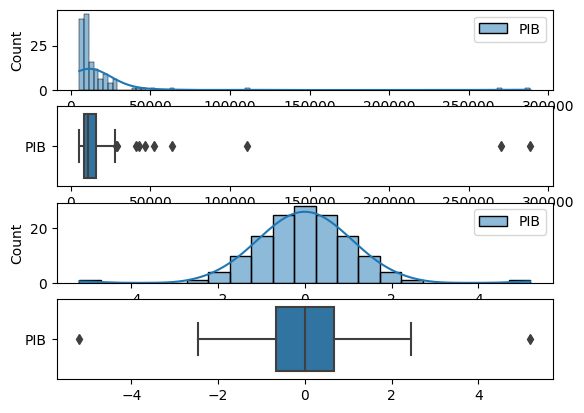

In [25]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

rng = np.random.RandomState(48)

scaler1 = preprocessing.MinMaxScaler(feature_range=(1, 2))
scaler2 = preprocessing.PowerTransformer(method='yeo-johnson')
scaler3 = preprocessing.PowerTransformer(method='box-cox')
scaler4 = preprocessing.QuantileTransformer(n_quantiles=200, output_distribution="normal", random_state=rng)

pipeline = Pipeline(steps=[('s', scaler1),('p', scaler3)])


#scaler2 = preprocessing.RobustScaler()
#scaler2 = preprocessing.StandardScaler()


d1 = scaler4.fit_transform(df_munic.iloc[:,2:3])
d2 = scaler1.fit_transform(df_munic.iloc[:,3:4])
d3 = scaler4.fit_transform(df_munic.iloc[:,4:5])
d4 = scaler1.fit_transform(df_munic.iloc[:,5:6])


ds = [d1, d2, d3, d4]

scaled_df = pd.DataFrame()
cont = 2
for i in ds:

    s_df = pd.DataFrame(i, columns=df_munic.iloc[:,cont:cont+1].columns)
    scaled_df = pd.concat([scaled_df, s_df], axis=1)
    cont += 1

scaled_df = pd.concat([df_munic.iloc[:,:2], scaled_df], axis=1)
#scaled_df

import matplotlib.pyplot as plt
import seaborn as sns

splot = scaled_df.iloc[:,2:3]
dplot = df_munic.iloc[:,2:3]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
sns.histplot(dplot, kde=True, ax=ax1)
sns.boxplot(dplot, orient="h", ax=ax2)
sns.histplot(splot, kde=True, ax=ax3)
sns.boxplot(splot, orient="h", ax=ax4)
#plt.xlim(-1, 1)
plt.show()

splot = scaled_df.iloc[:,4:5]
dplot = df_munic.iloc[:,4:5]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
sns.histplot(dplot, kde=True, ax=ax1)
sns.boxplot(dplot, orient="h", ax=ax2)
sns.histplot(splot, kde=True, ax=ax3)
sns.boxplot(splot, orient="h", ax=ax4)
#plt.xlim(-1, 1)
plt.show()



In [26]:
scaled_df.describe()

,Rede_de_Protecao_assistencia,IDH,PIB,GINI
count,144.000000,144.000000,1.440000e+02,144.000000
mean,-0.921913,1.774138,6.795243e-13,1.761196
std,2.626355,0.099055,1.145704e+00,0.081778
min,-5.199338,1.000000,-5.199338e+00,1.000000
25%,-1.452060,1.732909,-6.745207e-01,1.734694
50%,-0.202967,1.780831,6.938894e-17,1.775510
75%,0.583673,1.822386,6.745207e-01,1.795918
max,5.199338,2.000000,5.199338e+00,2.000000


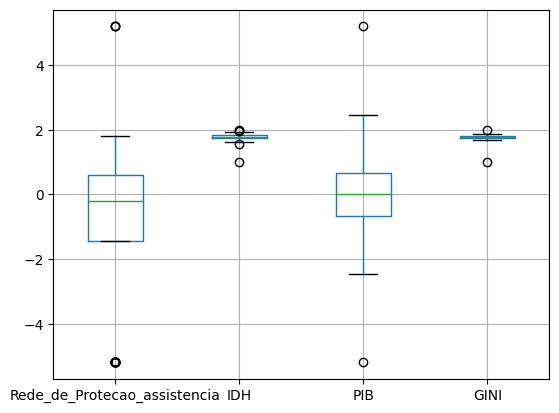

array([[-1.45205963e+00,  1.60723861e+00, -2.45762240e+00,
         1.67346939e+00],
       [-1.45205963e+00,  1.73290885e+00, -6.74520695e-01,
         1.73469388e+00],
       [-2.02966983e-01,  1.78083110e+00,  6.93889390e-17,
         1.77551020e+00],
       [ 5.83672668e-01,  1.82238606e+00,  6.74520695e-01,
         1.79591837e+00],
       [ 1.81236336e+00,  1.92627346e+00,  2.45762240e+00,
         1.87755102e+00]])

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def create_boxplot(dataset):

    Q3 = np.quantile(dataset, 0.75)
    Q1 = np.quantile(dataset, 0.25)
    MEDIAN = np.quantile(dataset, 0.50)
    IQR = Q3 - Q1

    lower_range = Q1 - 0.15 * IQR
    upper_range = Q3 + 0.15 * IQR

    while lower_range < 0:
        dst = dataset[dataset[dataset.columns[0]] > Q1]
        
        Q3 = np.quantile(dst, 0.75)
        Q1 = np.quantile(dst, 0.25)
        MEDIAN = np.quantile(dst, 0.50)
        IQR = Q3 - Q1
    
        lower_range = Q1 - 0.15 * IQR
        upper_range = Q3 + 0.15 * IQR

        dataset = dst
        
    print(f"Q3 = {Q3}")
    print(f"Q1 = {Q1}")
    print(f"IQR = {IQR}")
    print(f"Median = {MEDIAN}")
    print(f"Lower_Range = {lower_range}")
    print(f"Upper_Range = {upper_range}")
    
    
def print_limits(dataset) -> np.array:

    res = np.zeros((5, 4))

    #boxplot create
    _, bp = pd.DataFrame.boxplot(dataset, return_type='both')
    caps = [cap.get_ydata() for cap in bp["caps"]] # limites inferior e superior
    outliers = [flier.get_ydata() for flier in bp["fliers"]]  # Desconsiderar
    boxes = [box.get_ydata() for box in bp["boxes"]] # Q1 e Q3
    medians = [median.get_ydata() for median in bp["medians"]] # Mediana
    whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]] # Q1 Q3 LimSup LimInf
    plt.show()

    cont = 0
    for c in range(0, len(whiskers), 2):
        lower_range = whiskers[c][1]

        Q1 = whiskers[c][0]
        M = medians[cont][0]
        Q3 = whiskers[c+1][0]

        upper_range = whiskers[c+1][1]

        

        res[0][cont] = lower_range
        res[1][cont] = Q1
        res[2][cont] = M
        res[3][cont] = Q3
        res[4][cont] = upper_range

        cont += 1
    
    
    return res
         

print_limits(scaled_df.iloc[:,2:6])

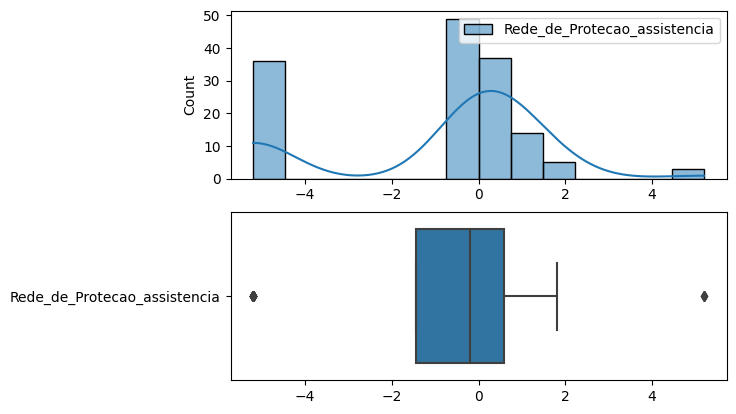

In [28]:

dplot = scaled_df.iloc[:,2:3]

fig, (ax1, ax2) = plt.subplots(2)
sns.histplot(dplot, kde=True, ax=ax1)
sns.boxplot(dplot, orient="h", ax=ax2)
#plt.xlim(-1, 1)
plt.show()

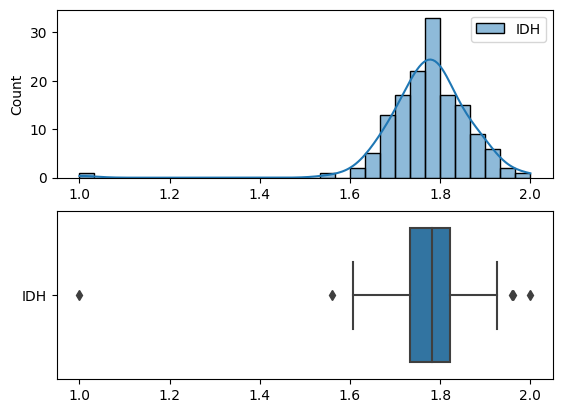

In [29]:
dplot = scaled_df.iloc[:,3:4]

fig, (ax1, ax2) = plt.subplots(2)
sns.histplot(dplot, kde=True, ax=ax1)
sns.boxplot(dplot, orient="h", ax=ax2)
plt.show()

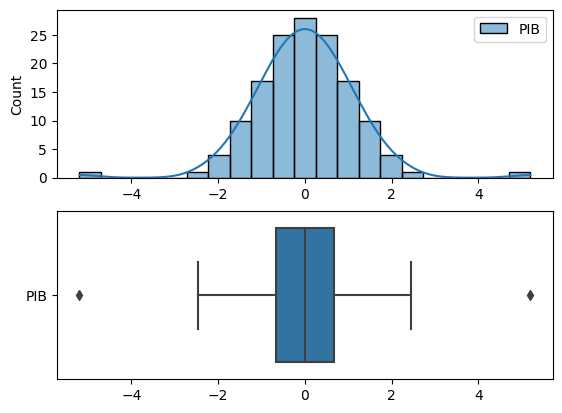

In [30]:
dplot = scaled_df.iloc[:,4:5]

fig, (ax1, ax2) = plt.subplots(2)
sns.histplot(dplot, kde=True, ax=ax1)
sns.boxplot(dplot, orient="h", ax=ax2)
plt.show()

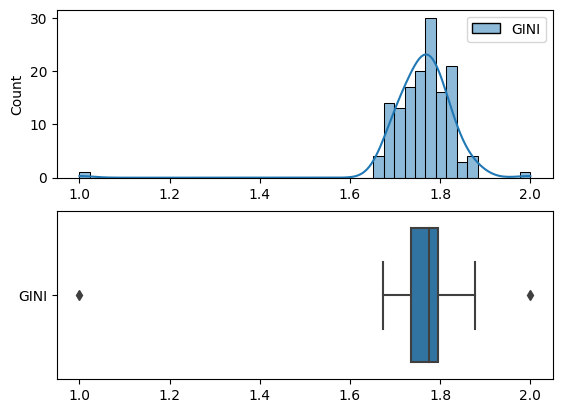

In [31]:
dplot = scaled_df.iloc[:,5:6]

fig, (ax1, ax2) = plt.subplots(2)
sns.histplot(dplot, kde=True, ax=ax1)
sns.boxplot(dplot, orient="h", ax=ax2)
plt.show()

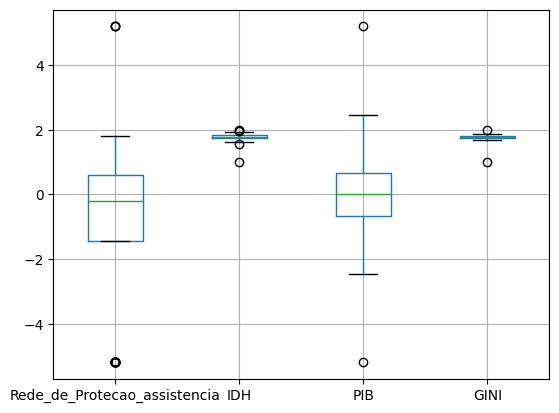

array([[-1.45205963e+00,  1.60723861e+00, -2.45762240e+00,
         1.67346939e+00],
       [-1.45205963e+00,  1.73290885e+00, -6.74520695e-01,
         1.73469388e+00],
       [-2.02966983e-01,  1.78083110e+00,  6.93889390e-17,
         1.77551020e+00],
       [ 5.83672668e-01,  1.82238606e+00,  6.74520695e-01,
         1.79591837e+00],
       [ 1.81236336e+00,  1.92627346e+00,  2.45762240e+00,
         1.87755102e+00]])

In [32]:
     #IP       #IDH      #PIB      #GINI
Q = [0.05,      0.05,       0.05,      0.05]
P = [0.08,      0.08,       0.08,      0.08]
V = [2.0,      2.0,       2.0,      2.0]
W = [0.5,      0.5,       0.5,      0.5]

B = print_limits(scaled_df.iloc[:,2:6]).tolist()
#B = print_limits(df_munic.iloc[:,2:6]).tolist()

np.array(B)

In [46]:
#df_munic.query('Rede_de_Protecao_assistencia < 0.15')
scaled_df.query('Rede_de_Protecao_assistencia < -1.4520')

,id,localidade,Rede_de_Protecao_assistencia,IDH,PIB,GINI,CLASS,denuncias
x6,150040,Alenquer,-5.199338,1.756032,-0.114185,1.795918,4,8
x7,150050,Almeirim,-5.199338,1.860590,0.647231,2.000000,2,5
x8,150060,Altamira,-5.199338,1.891421,1.180599,1.816327,1,14
x11,150085,Anapu,-5.199338,1.734584,0.542589,1.816327,3,10
x13,150095,Aurora do Pará,-5.199338,1.695710,-1.589764,1.734694,4,3
x17,150125,Bannach,-5.199338,1.796247,1.216548,1.775510,3,1
x20,150145,Belterra,-5.199338,1.788204,-0.330187,1.693878,4,0
x26,150175,Brejo Grande do Araguaia,-5.199338,1.792225,0.061390,1.775510,4,2
x30,150195,Cachoeira do Piriá,-5.199338,1.634048,-5.199338,1.714286,5,1
x43,150280,Curralinho,-5.199338,1.672922,-1.146113,1.795918,4,14


In [34]:
T = scaled_df.iloc[:, 2:].values

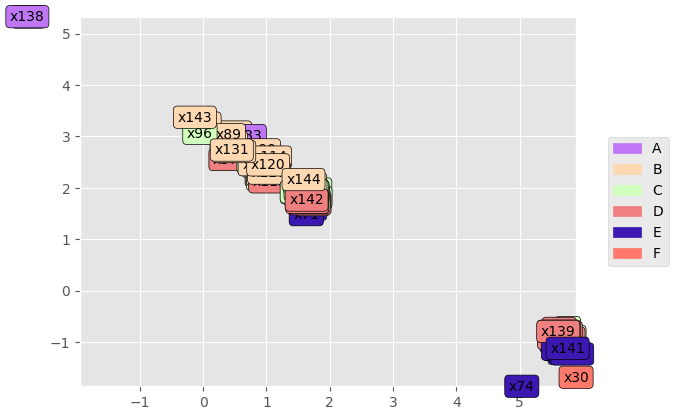

In [35]:
from pyDecision.algorithm import electre_tri_b

classification = electre_tri_b(T, W , Q , P , V , B, cut_level = 0.6, verbose = False, rule = 'oc', graph = True)

In [36]:
classification.count(0)

4

In [37]:
scaled_df['CLASS'] = classification

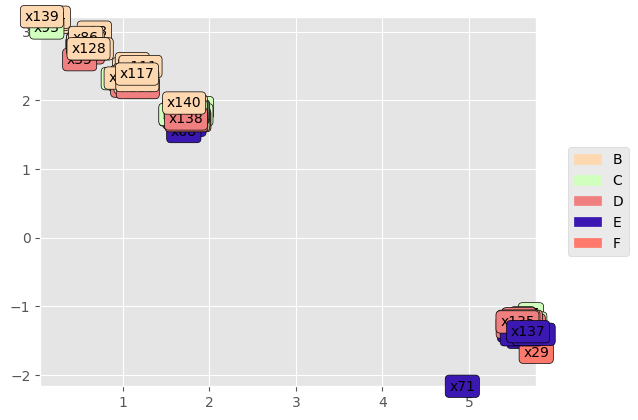

In [38]:
df__ = scaled_df.query('CLASS != 0')

df_ = df__.iloc[:, 2:6]


c = electre_tri_b(np.array(df_), W , Q , P , V , B, cut_level = 0.6, verbose = False, rule = 'oc', graph = True)


In [39]:
scaled_df = scaled_df.rename(index=lambda s: 'x' + str(s + 1))

In [49]:
scaled_df.query('CLASS == 0')

,id,localidade,Rede_de_Protecao_assistencia,IDH,PIB,GINI,CLASS,denuncias
x18,150130,Barcarena,5.199338,1.887399,1.728403,1.836735,0,65
x33,150215,Canaã dos Carajás,0.583673,1.902145,5.199338,1.734694,0,14
x66,150420,Marabá,5.199338,1.895442,1.655110,1.836735,0,106
x138,150810,Tucuruí,5.199338,1.892761,1.812363,1.816327,0,52


In [41]:
import geopandas as gpd

gdf_munic = gpd.read_file('json/munics.geojson')

for value in gdf_munic['id']:
    gdf_munic['id'].replace(to_replace=value, value=value[:6], regex=True,inplace=True)


df_teste = pd.merge(scaled_df, gdf_munic, on='id', how='left')

df_teste = df_teste[['id', 'localidade', 'geometry']]

df_teste['classe'] = classification

In [42]:
clusdict={5: '1 - Extremely High', 4: '2 - Very High', 3: '3 - High', 2: '4 - Medium', 1: '5 - Low', 0: '6 - Very Low' }
df_teste['legenda'] = df_teste['classe'].map(clusdict)
df_teste['classe'] = classification

gpd_teste = gpd.GeoDataFrame(df_teste)

ax = gpd_teste.plot(column='legenda', categorical=True, legend=True, legend_kwds={'loc': 'upper right'}, figsize=(10,10), cmap='prism')

def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

replace_legend_items(ax.get_legend(), clusdict)

ax.set_axis_off()

In [43]:
denuncias = pd.read_json('json/casos_violencia_por_municipio.json')
denuncias = denuncias.rename(index=lambda s: 'x' + str(s + 1))

scaled_df['denuncias'] = denuncias['casos']

In [44]:
scaled_df

,id,localidade,Rede_de_Protecao_assistencia,IDH,PIB,GINI,CLASS,denuncias
x1,150010,Abaetetuba,1.812363,1.841823,-0.293381,1.816327,1,77
x2,150013,Abel Figueiredo,-0.202967,1.833780,0.202967,1.755102,2,0
x3,150020,Acará,1.293598,1.678284,0.405222,1.734694,2,11
x4,150030,Afuá,1.293598,1.655496,-0.311731,1.795918,3,1
x5,150034,Água Azul do Norte,-0.202967,1.756032,0.625766,1.755102,1,4
...,...,...,...,...,...,...,...,...
x140,150815,Uruará,-0.202967,1.789544,0.367446,1.775510,2,2
x141,150820,Vigia,-5.199338,1.827078,-1.379203,1.734694,4,10
x142,150830,Viseu,-0.202967,1.690349,-0.783103,1.755102,3,4
x143,150835,Vitória do Xingu,1.812363,1.798928,2.457622,1.775510,1,6


In [45]:
data = scaled_df

sns.set_style("whitegrid")
 
# depict visualization
gfg = sns.boxplot(x="Rede_de_Protecao_assistencia", y="denuncias", data=data, palette='hot_r')

gfg.set_ylim(0, 120)
gfg.set(xlabel ="Support and Protection Index (IAP)", ylabel = "Denunciations")



[Text(0.5, 89.68626392038504, 'Support and Protection Index (IAP)'),
 Text(80.47222222222221, 0.5, 'Denunciations')]